# Scaling
Transform numerical data into same range (typically small). Some method may work best with scaling
ex. KNN, Neural Network, Linear Model
<br>
Scaling:
- MinMax Scaler
- Standard Scaler
- Robust Scaler

In [1]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips= sns.load_dataset('tips')

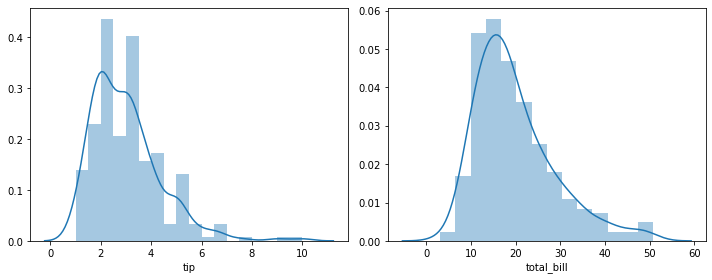

In [3]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(tips['tip'])

plt.subplot(122)
sns.distplot(tips['total_bill'])
plt.tight_layout()

In [4]:
tips[['tip','total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [6]:
X=tips[['tip','total_bill']]

In [7]:
minmax=MinMaxScaler()
standard=StandardScaler()
robust=RobustScaler()

## Minmax 
Transform each variable to Range 0 - 1  

\begin{align}
z_i = \frac{x_i - min(x_i)}{max(x_i) - min(x_i)}
\end{align}

In [8]:
X_minmax=minmax.fit_transform(X)
X_minmax=pd.DataFrame(X_minmax, columns=['tip','total_bill'])
X_minmax

,tip,total_bill
0,0.001111,0.291579
1,0.073333,0.152283
2,0.277778,0.375786
3,0.256667,0.431713
4,0.290000,0.450775
...,...,...
239,0.546667,0.543779
240,0.111111,0.505027
241,0.111111,0.410557
242,0.083333,0.308965


In [9]:
X_minmax.describe()

,tip,total_bill
count,244.000000,244.000000
mean,0.222031,0.350145
std,0.153738,0.186477
min,0.000000,0.000000
25%,0.111111,0.215281
50%,0.211111,0.308442
75%,0.284722,0.441087
max,1.000000,1.000000


range data (min-max) menjadi 0 dan 1

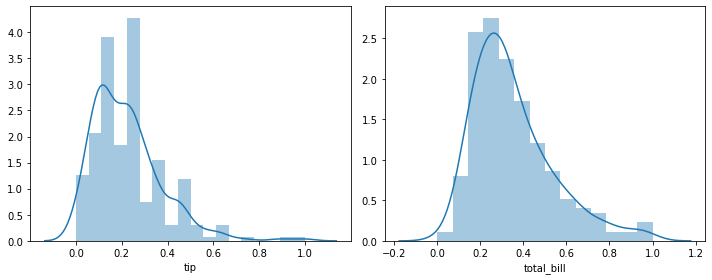

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(X_minmax['tip'])

plt.subplot(122)
sns.distplot(X_minmax['total_bill'])
plt.tight_layout()

## Standard Scaler 
Transform each variabels to : mean = 0 stdev =  1
\begin{align}
z_i = \frac{x_i - \bar{x}}{s}
\end{align}

In [11]:
X_standard= standard.fit_transform(X)
X_standard= pd.DataFrame(X_standard, columns=['tip','total_bill'])
X_standard

,tip,total_bill
0,-1.439947,-0.314711
1,-0.969205,-1.063235
2,0.363356,0.137780
3,0.225754,0.438315
4,0.443020,0.540745
...,...,...
239,2.115963,1.040511
240,-0.722971,0.832275
241,-0.722971,0.324630
242,-0.904026,-0.221287


In [12]:
X_standard.describe()

,tip,total_bill
count,2.440000e+02,2.440000e+02
mean,2.846297e-16,-6.597637e-17
std,1.002056e+00,1.002056e+00
min,-1.447189e+00,-1.881547e+00
25%,-7.229713e-01,-7.247111e-01
50%,-7.117518e-02,-2.241005e-01
75%,4.086192e-01,4.886857e-01
max,5.070772e+00,3.492068e+00


nilai mean dan std mendekati 0 dan 1

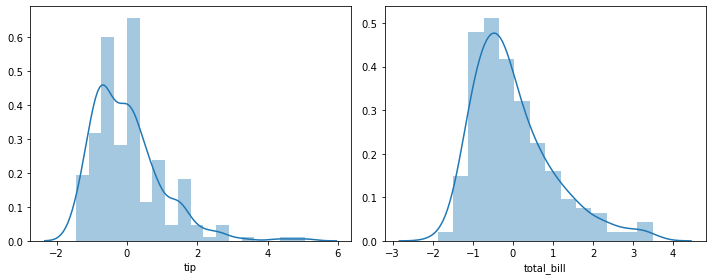

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(X_standard['tip'])

plt.subplot(122)
sns.distplot(X_standard['total_bill'])
plt.tight_layout()

## Robust Scaler  
Transform each variabel into small range, used for data with outliers
\begin{align}
z_i = \frac{x_i - Q_1(x_i)}{Q_3(x_i) - Q_1(x_i)}
\end{align}


In [14]:
X_robust= robust.fit_transform(X)
X_robust=pd.DataFrame(X_robust,columns=['tip','total_bill'])
X_robust

,tip,total_bill
0,-1.2096,-0.074675
1,-0.7936,-0.691558
2,0.3840,0.298237
3,0.2624,0.545918
4,0.4544,0.630334
...,...,...
239,1.9328,1.042208
240,-0.5760,0.870594
241,-0.5760,0.452226
242,-0.7360,0.002319


In [15]:
X_robust.describe()

,tip,total_bill
count,244.000000,2.440000e+02
mean,0.062898,1.846886e-01
std,0.885528,8.258267e-01
min,-1.216000,-1.365955e+00
25%,-0.576000,-4.125696e-01
50%,0.000000,-1.647987e-16
75%,0.424000,5.874304e-01
max,4.544000,3.062616e+00


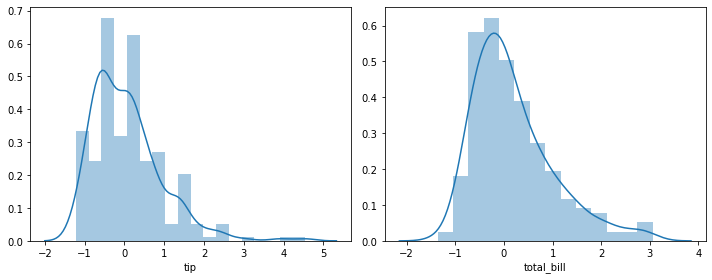

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(X_robust['tip'])

plt.subplot(122)
sns.distplot(X_robust['total_bill'])
plt.tight_layout()

# Encoders
merepresentasikan data kategorikal menjadi numerik agar bisa diproses oleh machine learning

In [17]:
# !pip install category_encoders

## One Hot

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
pd.get_dummies(tips)

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


In [20]:
onehot=OneHotEncoder()
onehot.fit_transform(tips)

<244x368 sparse matrix of type '<class 'numpy.float64'>'
	with 1708 stored elements in Compressed Sparse Row format>

In [21]:
transformer=ColumnTransformer([
    ('encoder',OneHotEncoder(),['sex','smoker','day','time']) #nama, transformer, kolom
])

In [22]:
pd.DataFrame(transformer.fit_transform(tips),columns=transformer.get_feature_names())

,encoder__x0_Female,encoder__x0_Male,encoder__x1_No,encoder__x1_Yes,encoder__x2_Fri,encoder__x2_Sat,encoder__x2_Sun,encoder__x2_Thur,encoder__x3_Dinner,encoder__x3_Lunch
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [23]:
transformer.get_feature_names()

['encoder__x0_Female',
 'encoder__x0_Male',
 'encoder__x1_No',
 'encoder__x1_Yes',
 'encoder__x2_Fri',
 'encoder__x2_Sat',
 'encoder__x2_Sun',
 'encoder__x2_Thur',
 'encoder__x3_Dinner',
 'encoder__x3_Lunch']

In [24]:
transformer=ColumnTransformer([
    ('one hot',OneHotEncoder(),['sex','smoker','day','time']), #nama, transformer, kolom
    ('scaler', MinMaxScaler(),['tip','total_bill'])
])

In [25]:
transformer.fit(tips)

ColumnTransformer(transformers=[('one hot', OneHotEncoder(),
                                 ['sex', 'smoker', 'day', 'time']),
                                ('scaler', MinMaxScaler(),
                                 ['tip', 'total_bill'])])

In [26]:
columns=list(transformer.transformers_[0][1].get_feature_names())+['tip','total_bill']

In [27]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Female', 'x0_Male', 'x1_No', 'x1_Yes', 'x2_Fri', 'x2_Sat',
       'x2_Sun', 'x2_Thur', 'x3_Dinner', 'x3_Lunch'], dtype=object)

In [28]:
pd.DataFrame(transformer.transform(tips),columns=columns)

,x0_Female,x0_Male,x1_No,x1_Yes,x2_Fri,x2_Sat,x2_Sun,x2_Thur,x3_Dinner,x3_Lunch,tip,total_bill
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.001111,0.291579
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.073333,0.152283
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.277778,0.375786
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.256667,0.431713
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.290000,0.450775
...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.546667,0.543779
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.111111,0.505027
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.111111,0.410557
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.083333,0.308965


## Ordinal encoding (.map)

In [29]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [30]:
tips_ord=tips.copy()

In [31]:
tips_ord['day']=tips['day'].map({'Thur':1,'Fri':2,'Sat':3,'Sun':4})

In [32]:
tips_ord

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,4,Dinner,2
1,10.34,1.66,Male,No,4,Dinner,3
2,21.01,3.50,Male,No,4,Dinner,3
3,23.68,3.31,Male,No,4,Dinner,2
4,24.59,3.61,Female,No,4,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,3,Dinner,3
240,27.18,2.00,Female,Yes,3,Dinner,2
241,22.67,2.00,Male,Yes,3,Dinner,2
242,17.82,1.75,Male,No,3,Dinner,2


## Ordinal Encoding with Category Encoders library

In [33]:
import category_encoders as ce

In [34]:
ordinal_mapping= [
    {'col':'day',
    'mapping':{None:0,'Thur':1,'Fri':2,'Sat':2,'Sun':4}}
]

In [35]:
ordinal_encoder=ce.OrdinalEncoder(mapping=ordinal_mapping)
df_ord=ordinal_encoder.fit_transform(tips['day'])
df_ord

,day
0,4
1,4
2,4
3,4
4,4
...,...
239,2
240,2
241,2
242,2


In [36]:
pd.concat([tips.drop(columns='day'),df_ord],axis=1)

,total_bill,tip,sex,smoker,time,size,day
0,16.99,1.01,Female,No,Dinner,2,4
1,10.34,1.66,Male,No,Dinner,3,4
2,21.01,3.50,Male,No,Dinner,3,4
3,23.68,3.31,Male,No,Dinner,2,4
4,24.59,3.61,Female,No,Dinner,4,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,2
240,27.18,2.00,Female,Yes,Dinner,2,2
241,22.67,2.00,Male,Yes,Dinner,2,2
242,17.82,1.75,Male,No,Dinner,2,2


In [37]:
#lebih dari 1 kolom
ordinal_mapping= [
    {'col':'day',
    'mapping':{None:0,'Thur':1,'Fri':2,'Sat':2,'Sun':4}},
    {'col':'time',
    'mapping':{None:0,'Lunch':1,'Dinner':2}}
]

In [38]:
ordinal_encoder= ce.OrdinalEncoder(mapping=ordinal_mapping)
ordinal_encoder.fit_transform(tips[['day','time']])

,day,time
0,4,2
1,4,2
2,4,2
3,4,2
4,4,2
...,...,...
239,2,2
240,2,2
241,2,2
242,2,2


## Binary Encoder

In [39]:
binary=ce.BinaryEncoder()
df_bin=binary.fit_transform(tips['day'])

In [40]:
tips['day']

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): [Thur, Fri, Sat, Sun]

In [41]:
pd.concat([tips.drop(columns='day'),df_bin],axis=1)

,total_bill,tip,sex,smoker,time,size,day_0,day_1,day_2
0,16.99,1.01,Female,No,Dinner,2,0,0,1
1,10.34,1.66,Male,No,Dinner,3,0,0,1
2,21.01,3.50,Male,No,Dinner,3,0,0,1
3,23.68,3.31,Male,No,Dinner,2,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,0,1,0
240,27.18,2.00,Female,Yes,Dinner,2,0,1,0
241,22.67,2.00,Male,Yes,Dinner,2,0,1,0
242,17.82,1.75,Male,No,Dinner,2,0,1,0


# Apply Several Preprocessing Methods to Modeling: Ridge

data : tips  
target : tip  
preprocess:  
1. one hot encoding : sex, smoker, time
2. binary encoding : day
3. robust scaler : total_bill
4. no treatment : size  

Random state 10, data splitting 70:30 model Ridge default


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

## data

In [43]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Preprocessing  
1. one hot encoding : sex, smoker, time
2. binary encoding : day
3. robust scaler : total_bill
4. no treatment : size 

In [44]:
transformer= ColumnTransformer([
    ('one hot',OneHotEncoder(drop='first'),['sex','smoker','time']), #name, transformer, kolom
    ('binary', ce.BinaryEncoder(),['day']),
    ('robust',RobustScaler(),['total_bill'])
], remainder='passthrough')

In [45]:
transformer.fit_transform(tips) #cek transformer jalan atau tidak

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.46753247e-02,  1.01000000e+00,  2.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.91558442e-01,  1.66000000e+00,  3.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.98237477e-01,  3.50000000e+00,  3.00000000e+00],
       ...,
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         4.52226345e-01,  2.00000000e+00,  2.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.31910946e-03,  1.75000000e+00,  2.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         9.13729128e-02,  3.00000000e+00,  2.00000000e+00]])

## Data Splitting

In [46]:
x=tips.drop(columns='tip')
y=tips['tip']

In [47]:
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=10)

## Data Transform

In [48]:
x_train.head()

,total_bill,sex,smoker,day,time,size
58,11.24,Male,Yes,Sat,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
68,20.23,Male,No,Sat,Dinner,2
184,40.55,Male,Yes,Sun,Dinner,2


In [49]:
x_train_preprocessed= transformer.fit_transform(x_train)
x_test_preprocessed= transformer.transform(x_test)

In [50]:
x_train_preprocessed=pd.DataFrame(x_train_preprocessed)
x_test_preprocessed=pd.DataFrame(x_test_preprocessed)

In [51]:
x_train_preprocessed

,0,1,2,3,4,5,6,7
0,1.0,1.0,0.0,0.0,0.0,1.0,-0.566396,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.647696,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.316170,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.245709,2.0
4,1.0,1.0,0.0,0.0,1.0,0.0,2.081301,2.0
...,...,...,...,...,...,...,...,...
178,1.0,0.0,0.0,0.0,0.0,1.0,0.007227,3.0
179,1.0,0.0,0.0,0.0,1.0,0.0,0.367660,2.0
180,1.0,0.0,0.0,0.0,0.0,1.0,-0.382114,2.0
181,0.0,0.0,1.0,0.0,1.0,1.0,1.110208,6.0


In [52]:
transformer.transformers_

[('one hot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
 ('binary', BinaryEncoder(), ['day']),
 ('robust', RobustScaler(), ['total_bill']),
 ('remainder', 'passthrough', [5])]

In [53]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [54]:
transformer.transformers_[1][1].get_feature_names()

['day_0', 'day_1', 'day_2']

In [55]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill scaled','size']
features

['x0_Male',
 'x1_Yes',
 'x2_Lunch',
 'day_0',
 'day_1',
 'day_2',
 'total_bill scaled',
 'size']

In [56]:
x_train_preprocessed.columns=features
x_test_preprocessed.columns=features

In [57]:
x_train_preprocessed

,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill scaled,size
0,1.0,1.0,0.0,0.0,0.0,1.0,-0.566396,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.647696,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.316170,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.245709,2.0
4,1.0,1.0,0.0,0.0,1.0,0.0,2.081301,2.0
...,...,...,...,...,...,...,...,...
178,1.0,0.0,0.0,0.0,0.0,1.0,0.007227,3.0
179,1.0,0.0,0.0,0.0,1.0,0.0,0.367660,2.0
180,1.0,0.0,0.0,0.0,0.0,1.0,-0.382114,2.0
181,0.0,0.0,1.0,0.0,1.0,1.0,1.110208,6.0


## Model Fitting and evaluation

In [58]:
ridge=Ridge()
ridge.fit(x_train_preprocessed, y_train)

Ridge()

In [59]:
y_pred=ridge.predict(x_test_preprocessed)
print('mse:', mean_squared_error(y_test,y_pred))

mse: 1.0577456219830774


## Model properties

In [60]:
pd.DataFrame({
    'features':features,
    'coef':ridge.coef_
})

,features,coef
0,x0_Male,-0.219943
1,x1_Yes,-0.071079
2,x2_Lunch,0.116938
3,day_0,0.031693
4,day_1,-0.002460
5,day_2,-0.061386
6,total_bill scaled,1.086144
7,size,0.172890


# Apply Several Preprocessing Methods to Modeling: DecisionTreeRegressor  
data : tips
target : tip
preprocess v1:  
1. one hot encoding : sex, smoker, time
2. ordinal encoding : day
3. no treatment : size, total_bill  

Random state 10, data splitting 70:30 model Tree(max depth 3)  


In [61]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

## Preprocessing

In [62]:
ordinal_mapping = [
    {'col':'day',
    'mapping':{None:0,'Fri':1,'Thur':2,'Sat':3,'Sun':4}}
    ]

ordinal_encoder = ce.OrdinalEncoder(mapping = ordinal_mapping)

In [63]:
transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['sex','smoker','time']),
                                 ('ordinal encoder',ordinal_encoder,['day'])
                                ], remainder = 'passthrough')

In [64]:
x_train_preprocessed = transformer.fit_transform(x_train)
x_test_preprocessed = transformer.transform(x_test)

In [65]:
x_train_preprocessed = pd.DataFrame(x_train_preprocessed)
x_test_preprocessed = pd.DataFrame(x_test_preprocessed)

In [66]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill','size']
features

['x0_Male', 'x1_Yes', 'x2_Lunch', 'day', 'total_bill', 'size']

In [67]:
x_train_preprocessed.columns = features
x_test_preprocessed.columns = features
x_train_preprocessed

,x0_Male,x1_Yes,x2_Lunch,day,total_bill,size
0,1.0,1.0,0.0,3.0,11.24,2.0
1,1.0,0.0,0.0,4.0,10.34,3.0
2,1.0,0.0,0.0,4.0,21.01,3.0
3,1.0,0.0,0.0,3.0,20.23,2.0
4,1.0,1.0,0.0,4.0,40.55,2.0
...,...,...,...,...,...,...
178,1.0,0.0,0.0,3.0,17.59,3.0
179,1.0,0.0,0.0,4.0,21.58,2.0
180,1.0,0.0,0.0,3.0,13.28,2.0
181,0.0,0.0,1.0,2.0,29.80,6.0


## Model fitting and evaluation

In [68]:
tree= DecisionTreeRegressor(max_depth=3)
tree.fit(x_train_preprocessed, y_train)

DecisionTreeRegressor(max_depth=3)

In [69]:
y_pred= tree.predict(x_test_preprocessed)
print('mse:',mean_squared_error(y_test,y_pred))

mse: 0.8414314225960589


## Model Properties

In [70]:
importance_table=pd.DataFrame({'importance':tree.feature_importances_},index=features)
importance_table

,importance
x0_Male,0.000000
x1_Yes,0.108978
x2_Lunch,0.000000
day,0.000000
total_bill,0.888692
size,0.002329


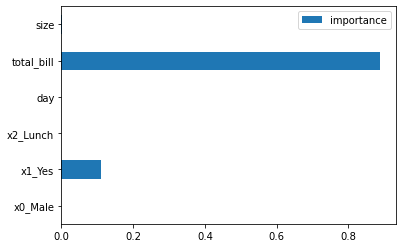

In [71]:
importance_table.plot(kind='barh')

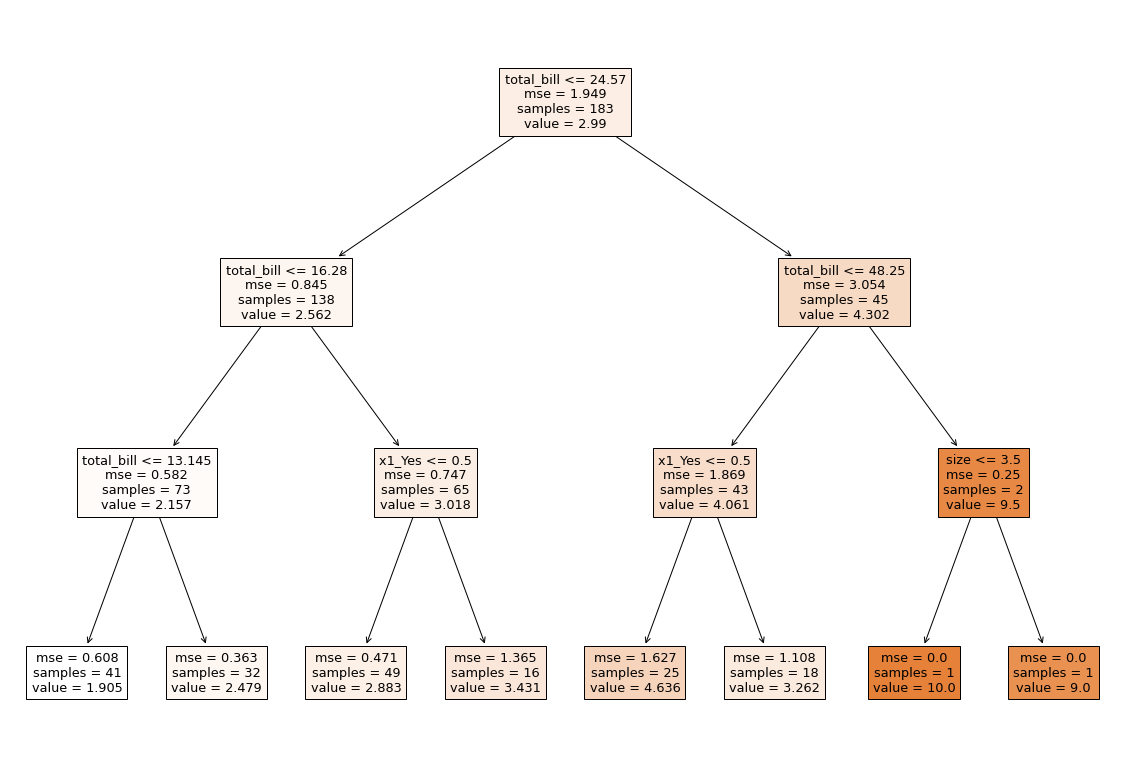

In [72]:
plt.figure(figsize=(20,14))
plot_tree(tree,feature_names=features, filled=True)
plt.show()

In [73]:
y_pred

array([2.479375  , 3.43125   , 2.479375  , 3.43125   , 2.479375  ,
       3.26166667, 2.88306122, 3.26166667, 2.88306122, 2.88306122,
       3.43125   , 3.26166667, 1.90463415, 3.26166667, 2.88306122,
       2.88306122, 2.479375  , 2.479375  , 3.43125   , 2.479375  ,
       1.90463415, 2.479375  , 2.479375  , 1.90463415, 2.88306122,
       1.90463415, 3.43125   , 2.88306122, 1.90463415, 9.        ,
       4.636     , 3.26166667, 1.90463415, 1.90463415, 2.88306122,
       1.90463415, 2.88306122, 1.90463415, 3.43125   , 3.26166667,
       3.43125   , 3.26166667, 1.90463415, 3.26166667, 1.90463415,
       1.90463415, 2.88306122, 2.479375  , 1.90463415, 3.43125   ,
       2.88306122, 4.636     , 3.43125   , 4.636     , 1.90463415,
       3.43125   , 1.90463415, 1.90463415, 3.26166667, 1.90463415,
       2.88306122])

# exercise

In [75]:
df=pd.read_csv('titanic.csv')
df

,sex,age,parch,fare,class,deck,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,NaN,Southampton,no,False
1,female,38.0,0,71.2833,First,C,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,NaN,Southampton,yes,True
3,female,35.0,0,53.1000,First,C,Southampton,yes,False
4,male,35.0,0,8.0500,Third,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,13.0000,Second,NaN,Southampton,no,True
887,female,19.0,0,30.0000,First,B,Southampton,yes,True
888,female,NaN,2,23.4500,Third,NaN,Southampton,no,False
889,male,26.0,0,30.0000,First,C,Cherbourg,yes,True


Dengan menggunakan data titanic:  
1. pilih feature yang akan digunakan untuk memprediksi apakah seseorang bisa selamat/tidak ['alive']
2. isi missing value pada feature jika ada (mean/median/modus)
3. buat skema preprocessing, jelaskan alasan skema kalian.
4. evaluasi performa 3 model berikut:
    * logistic regression
    * knn classifier
    * decision tree classifier

email link github tugas kalian ke brigita_gems@gmail.com untuk feedback

In [77]:
pd.crosstab(index=df['parch'],columns=df['alone'])

alone,False,True
parch,,
0,141,537
1,118,0
2,80,0
3,5,0
4,4,0
5,5,0
6,1,0


In [78]:
pd.crosstab(index=df['deck'],columns=df['class'])

class,First,Second,Third
deck,,,
A,15,0,0
B,47,0,0
C,59,0,0
D,29,4,0
E,25,4,3
F,0,8,5
G,0,0,4


In [83]:
df.isna().sum()/df.shape[1]

sex             0.000000
age            19.666667
parch           0.000000
fare            0.000000
class           0.000000
deck           76.444444
embark_town     0.222222
alive           0.000000
alone           0.000000
dtype: float64

In [82]:
df.shape

(891, 9)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   parch        891 non-null    int64  
 3   fare         891 non-null    float64
 4   class        891 non-null    object 
 5   deck         203 non-null    object 
 6   embark_town  889 non-null    object 
 7   alive        891 non-null    object 
 8   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 56.7+ KB


x= *sex*, age, parch, fare, *class*, *embark_town*, *alone*  
y= alive  

transformer 1  
onehot: sex, embark town, alone - nominal, jumlah kategori tidak terlalu banyak  
ordinal: class - data ordinal  

transformer 2  
onehot: sex, embark town, alone  
ordinal: class  
fare, age: robust scaling  

transformer 3  
onehot: sex, embark town, alone, class  
fare, age: robust scaling  